# 15.3 지도학습 모델의 종류
## 결정트리
### 데이터 분석 및 준비

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
y = range(8)
print(list(y))
print(train_test_split(y))

[0, 1, 2, 3, 4, 5, 6, 7]
[[7, 6, 1, 0, 3, 2], [5, 4]]


In [6]:
a, b = train_test_split(y)
print(a, b)

[1, 3, 4, 7, 5, 6] [2, 0]


In [7]:
#p263
import numpy as np
from sklearn.model_selection import train_test_split
y = range(6)
print(list(y))
print(train_test_split(y, test_size=0.5))

[0, 1, 2, 3, 4, 5]
[[5, 2, 4], [0, 3, 1]]


In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
X = np.arange(12).reshape((6, 2))
y = range(6)
print(X)
print(list(y))

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]
[0, 1, 2, 3, 4, 5]


In [31]:
# 6쌍의 입력데이터와 6개의 라벨(타켓)
import numpy as np
from sklearn.model_selection import train_test_split
X = np.arange(12).reshape((6, 2))
y = range(6)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[ 8  9]
 [ 2  3]
 [10 11]
 [ 6  7]]
[4, 1, 5, 3]
[[0 1]
 [4 5]]
[0, 2]


In [10]:
X = np.arange(15).reshape((3, 5))
y = range(3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[ 0  1  2  3  4]
 [10 11 12 13 14]]
[0, 2]
[[5 6 7 8 9]]
[1]


### 학습 및 예측

In [11]:
#p264
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('예측:\n', predictions)
print('정답(y_test):\n', y_test)

예측:
 [2 2 2 1 1 1 1 0 2 0 1 2 0 2 1 2 2 1 2 2 0 1 1 0 1 1 0 0 0 1 2 2 0 0 1 0 0
 0 1 0 1 0 2 1 1 2 1 2 0 0 1 1 2 0 2 2 2 1 2 0 2 0 0 0 2 0 0 2 0 0 1 2 1 1
 2]
정답(y_test):
 [2 2 2 1 1 1 1 0 2 0 1 2 0 2 1 2 2 1 2 2 0 1 1 0 1 1 0 0 0 1 2 2 0 0 1 0 0
 0 1 0 1 0 2 1 1 2 1 2 0 0 1 1 1 0 2 1 2 2 2 0 2 0 0 0 2 0 0 2 0 0 1 2 1 1
 2]


### 테스트

In [12]:
#p265
from sklearn.metrics import accuracy_score
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
b = [1, 2, 4, 4, 5, 6, 7, 8, 9, 10]
print(accuracy_score(a, b))

0.9


In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.96


## 최근접 이웃 탐색 모델
### K-최근접이웃 모델

In [35]:
#p266
X = [[0], [1], [2], [3], [4], [5]]
y = [0, 0, 0, 1, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [36]:
#p267
print(neigh.predict([[2.8]]))
print(neigh.predict_proba([[2.8]]))

[1]
[[0.33333333 0.66666667]]


In [37]:
print(neigh.predict([[2.3]]))
print(neigh.predict_proba([[2.3]]))

[0]
[[0.66666667 0.33333333]]


In [ ]:
# 2차원 예제

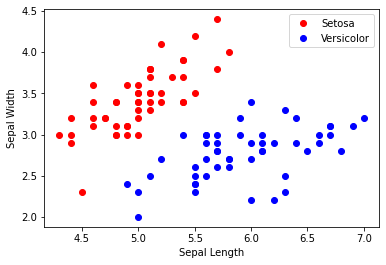

In [21]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()
sepal = iris.data[:100, 0:2]
kind = iris.target[:100]
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.plot(sepal[kind==0][:,0], sepal[kind==0][:,1], "ro", label='Setosa')
plt.plot(sepal[kind==1][:,0], sepal[kind==1][:,1], "bo", label='Versicolor')
#plt.plot(sepal[kind==2][:,0], sepal[kind==2][:,1], "yo", label='Virginica')
plt.legend()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sepal, kind)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
print(clf.predict([[5.5, 3.9]]))
print(clf.predict_proba([[5.5, 2.5]]))
clf.fit(X_train, y_train)
print("예측",clf.predict(X_test))
print('답 :',  y_test)

[0]
[[0. 1.]]
예측 [1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0]
답 : [1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0]


In [ ]:
print(neigh.predict([[2.8]]))
print(neigh.predict_proba([[2.8]]))
clf.fit(X_train, y_train)
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

In [ ]:
# KNeighborsClassifier로 회귀문제 해결

In [42]:
a = np.arange(16)
a = a.reshape(-1, 2)
a

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15]])

In [44]:
length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5, 44.0]) 
price = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(length, price)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
print(knr.score(X_test, y_test))
knr.predict([[30]])

0.9702432201026403


array([273.])

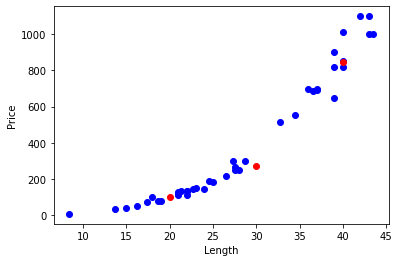

In [89]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
plt.xlabel('Length')
plt.ylabel('Price')
plt.plot(X_train, y_train, "bo")
test = [30, 20, 40]
test = np.array(test).reshape(-1, 1)
plt.plot(test, knr.predict(test), "ro")

In [ ]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5, 44.0]) 
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])
from sklearn.model_selection import train_test_split 
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))
knr.predict([[30]])

# KNeighborsClassifier를 이용한 Iris 데이터셋

In [38]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('예측:\n', predictions)
print('정답(y_test):\n', y_test)

예측:
 [1 1 2 1 0 0 0 1 1 0 1 2 0 0 0 1 2 1 0 0 2 0 2 1 2 2 1 1 0 1 1 2 1 2 0 2 1
 2 1 1 2 1 2 0 1 1 1 2 2 0 2 1 1 1 0 0 1 1 1 1 1 0 2 1 0 2 0 2 0 0 2 2 2 0
 1]
정답(y_test):
 [1 1 2 1 0 0 0 1 1 0 1 2 0 0 0 1 2 1 0 0 2 0 2 1 2 2 2 1 0 1 1 2 1 2 0 2 1
 2 1 1 2 1 2 0 1 1 1 2 2 0 2 1 1 1 0 0 1 1 1 1 1 0 2 1 0 2 0 2 0 0 2 2 2 0
 1]


In [39]:
#p268
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9866666666666667


### 나만의 분류자 모델

In [40]:
#p269
import random
class myKNN():
    def fit(self, X_train, y_train):
        self.X_train = X_train      # X_train 데이터를 그대로 저장!
        self.y_train = y_train      # y_train 데이터를 그대로 저장!
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = random.choice(self.y_train)
            predictions.append(label)
        return predictions

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

# from sklearn.neighbors import KNeighborsClassfier 사용하지 않고
clf = myKNN()                            # 나만의 분류자를 사용!
clf.fit(X_train, y_train)
preidctions = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.3333333333333333


### 유클리디어 방식의 분류자 모델
#### 요약 문제

In [41]:
#p270
import numpy as np
def euc(p1, p2):
    return np.sqrt(np.sum(np.power(p2-p1, 2)))
p1 = np.array([1, 1])
p2 = np.array([4, 4])
euc(p1, p2)

4.242640687119285

In [42]:
from scipy.spatial import distance
def euc(a, b) :
    return distance.euclidean(a, b)
p1 = np.array([1, 1])
p2 = np.array([4, 4])
euc(p1, p2)

4.242640687119285

In [43]:
from scipy.spatial import distance
def euc(a, b) :
    return distance.euclidean(a, b)
p1 = np.array([1, 1, 3, 3])
p2 = np.array([4, 4, 5, 5])
euc(p1, p2)

5.0990195135927845

In [44]:
#p271
from scipy.spatial import distance
def euc(a,b) :
    return distance.euclidean(a, b)
class eucKNN():
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = self.closest(row)
            predictions.append(label)
        return predictions
    def closest(self, row):
        best_dist = euc(row, self.X_train[0])
        best_index = 0
        for i in range(1, len(self.X_train)):
            dist = euc(row, self.X_train[i])
            if dist < best_dist:
                best_dist = dist
                best_index = 1
        return self.y_train[best_index]
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)
clf = eucKNN()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.32


## 서포트 벡터 머신

# 추가 프로그램

In [45]:
from sklearn import svm
X = [[0, 0], [3, 3]]
y = [5, 25]
regr = svm.SVR()
regr.fit(X, y)

regr.predict([[1, 1]])

array([14.52783293])

In [46]:
#p272
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9733333333333334


### [참고]

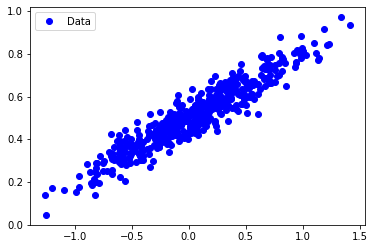

In [47]:
#p274
import numpy as np
points = 500
vectors = []
for i in range(points):
    x1= np.random.normal(0.0, 0.5)
    y1= x1 * 0.3 + 0.5 + np.random.normal(0.0, 0.05)
    vectors.append([x1, y1])
x_data = [v[0] for v in vectors]
y_data = [v[1] for v in vectors]

import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'bo', label='Data')
plt.legend()
plt.show();

Instructions for updating:
non-resource variables are not supported in the long term


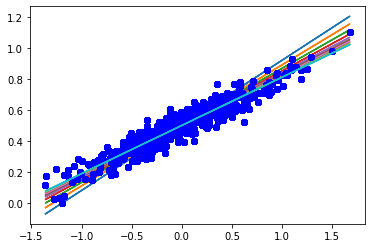

In [48]:
#p275
import matplotlib.pyplot as plt
import numpy as np
points = 500
vectors = []
for i in range(points):
    x1= np.random.normal(0.0, 0.5)
    y1= x1 * 0.3 + 0.5 + np.random.normal(0.0, 0.05)
    vectors.append([x1, y1])
x_data = [v[0] for v in vectors]
y_data = [v[1] for v in vectors]

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
a = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = a * x_data + b
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
%matplotlib inline
import matplotlib.pyplot as plt
for step in range(10):
    sess.run(train)       
    plt.plot(x_data, y_data, 'bo')
    plt.plot(x_data, sess.run(a) * x_data + sess.run(b))
plt.show()

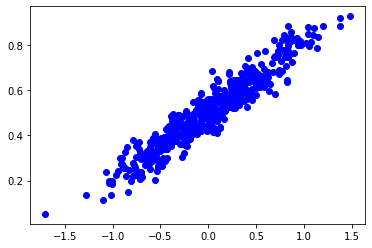

In [49]:
# 단순선형회귀(1차방정식)
import numpy as np
import matplotlib.pyplot as plt
points = 500
vectors = []
for i in range(points):
    x1= np.random.normal(0.0, 0.5)
    y1= x1 * 0.3 + 0.5 + np.random.normal(0.0, 0.05)
    vectors.append([x1, y1])
x_data = [v[0] for v in vectors]
y_data = [v[1] for v in vectors]
plt.scatter(x_data, y_data, color='blue', label='Training Data')

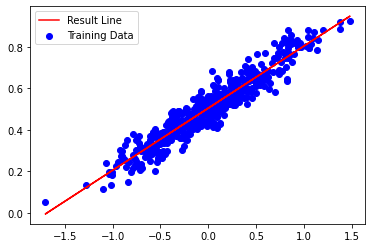

In [50]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(units=1, input_shape=[1]))
model.compile(loss='mse', optimizer='SGD') 
history = model.fit(x_data, y_data, epochs=100, verbose=False)
""" [3] 경계선 그래프 """
weights, bias = model.get_weights()
result_line = x_data * weights[0] + bias
plt.scatter(x_data, y_data, color='blue', label='Training Data')
plt.plot(x_data, result_line, color='red', label='Result Line')
plt.legend()
plt.show()

In [51]:
x_data

[0.4588710243213093,
 -0.7056767071295379,
 0.2640677951506879,
 -0.5203361198622772,
 0.1677984945751576,
 0.1671371573306774,
 -0.718256447431117,
 0.2906796490659682,
 0.19478264240850438,
 0.33131382722417285,
 1.3750591315890295,
 0.6138906337939352,
 -0.7252668867891436,
 0.41052012044835473,
 -0.36749134520886945,
 -0.8383267720270052,
 0.11903348020231792,
 -0.072806913240194,
 0.40887000184481276,
 -0.6000536585844611,
 0.18346560226785838,
 -0.09744768368348036,
 0.04759098864968634,
 0.017163936654019427,
 -0.287504569172623,
 -0.6113079629318734,
 0.8299262606508698,
 -0.2553132902896215,
 -0.39343041900838144,
 -0.5296276407467921,
 -0.03150581525821956,
 0.033513664772605915,
 0.1561628020309862,
 -0.5120223306959703,
 0.7790340580389501,
 -0.2394006642660419,
 -0.7183319787982316,
 -0.7013796628055936,
 0.7371247465735425,
 -0.08007114145481774,
 -0.24022565247565106,
 -0.16051910605761838,
 -0.15518211970690265,
 0.4061439423919241,
 -0.3810688028386613,
 0.098449248404

In [52]:
result_line

array([ 0.6418841 ,  0.29391572,  0.58367664,  0.34929573,  0.55491125,
        0.55471364,  0.29015688,  0.5916283 ,  0.56297415,  0.60376985,
        0.9156423 ,  0.68820416,  0.28806215,  0.62743679,  0.39496595,
        0.25427971,  0.5403402 ,  0.48301804,  0.62694373,  0.32547603,
        0.5595926 ,  0.47565535,  0.51899309,  0.50990145,  0.4188661 ,
        0.32211323,  0.75275589,  0.4284849 ,  0.38721532,  0.34651941,
        0.49535886,  0.51478677,  0.55143449,  0.3517799 ,  0.73754923,
        0.43323961,  0.29013431,  0.29519968,  0.72502668,  0.48084748,
        0.4329931 ,  0.45680952,  0.45840422,  0.62612918,  0.39090899,
        0.53418961,  0.53380044,  0.57356836,  0.50501759,  0.65511069,
        0.31975988,  0.62326049,  0.38759761,  0.40891494,  0.32759374,
        0.4496153 ,  0.47032552,  0.81852622,  0.58780822,  0.61742305,
        0.76101421,  0.24575758,  0.50705123,  0.79050634,  0.57081299,
        0.34549109,  0.36362794,  0.59614135,  0.66384393,  0.20

In [53]:
import numpy as np
test = np.array([[0.5], [-0.3]])
pred = model.predict(test)
print(pred)

[[0.6541735 ]
 [0.41513246]]


C:\Users\Administrator\anaconda3\envs\Keras\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


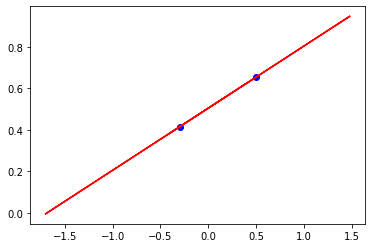

In [54]:
plt.scatter(test, pred, color='blue', label='Training Data')
plt.plot(x_data, result_line, color='red', label='Result Line')

In [55]:
x_value = [[0.5]]
result = x_value * weights[0] + bias
result

array([[0.65417349]])